In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 

In [2]:
weatherData = pd.read_csv("data/weatherAUS.csv")

In [3]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
weatherData["Date"] = pd.to_datetime(weatherData["Date"])


In [5]:
weatherData.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [6]:
weatherData.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
112561,2011-09-08,Witchcliffe,7.7,18.4,0.0,NaN,NaN,SSE,35.0,ESE,...,71.0,63.0,1039.3,1036.7,NaN,NaN,12.2,17.5,No,No
6066,2009-01-18,Cobar,17.9,34.2,0.0,12.0,11.3,SE,61.0,NE,...,46.0,19.0,1016.4,1013.5,1.0,2.0,21.6,32.2,No,No
25862,2013-11-29,Penrith,19.4,21.9,0.0,NaN,NaN,SSE,39.0,NNE,...,80.0,95.0,NaN,NaN,NaN,NaN,20.7,16.4,No,Yes
77950,2017-05-18,Portland,11.3,16.7,1.8,NaN,NaN,E,28.0,E,...,87.0,80.0,1022.7,1021.1,8.0,5.0,12.3,15.1,Yes,Yes
107212,2013-10-06,Woomera,13.4,27.0,0.0,10.0,9.6,SSE,41.0,S,...,67.0,23.0,1014.1,1011.5,1.0,3.0,15.8,25.7,No,No
122408,2013-08-03,Perth,9.0,21.7,0.0,3.2,9.7,E,19.0,NE,...,78.0,54.0,1027.1,1022.8,1.0,1.0,13.3,21.1,No,No
34779,2012-07-13,SydneyAirport,12.1,23.7,0.0,0.4,6.3,N,39.0,W,...,75.0,54.0,1011.4,1007.7,5.0,6.0,16.3,22.7,No,No
107671,2015-01-08,Woomera,27.7,40.1,0.0,15.6,5.0,SSE,69.0,E,...,38.0,38.0,1008.9,1004.0,1.0,5.0,31.6,37.3,No,Yes
109230,2010-09-21,Albany,9.5,20.1,0.0,3.6,11.4,NaN,NaN,ENE,...,69.0,69.0,1031.5,1028.2,1.0,1.0,13.8,17.8,No,No
134801,2014-01-03,Launceston,8.7,21.7,0.0,NaN,NaN,N,52.0,WNW,...,64.0,62.0,1001.3,995.0,NaN,NaN,16.5,19.2,No,No


In [7]:
dataFrom2016 = weatherData.loc[(weatherData['Date'] > "2016-01-01") & (weatherData['Date'] <= "2016-12-31")]

In [8]:
dataFrom2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
2503,2016-01-06,Albury,17.0,28.1,0.2,NaN,NaN,SE,39.0,SSE,...,76.0,52.0,1014.6,1012.6,8.0,8.0,20.3,25.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145279,2016-12-27,Uluru,22.1,35.8,63.8,NaN,NaN,WNW,43.0,WNW,...,77.0,41.0,997.8,995.2,4.0,2.0,26.0,33.5,Yes,No
145280,2016-12-28,Uluru,22.6,36.8,0.0,NaN,NaN,NW,50.0,NW,...,63.0,39.0,1000.0,998.8,NaN,NaN,29.7,34.0,No,No
145281,2016-12-29,Uluru,23.2,38.0,0.0,NaN,NaN,SSW,33.0,S,...,25.0,14.0,1004.4,1001.0,NaN,NaN,28.7,36.4,No,No
145282,2016-12-30,Uluru,19.7,37.0,0.0,NaN,NaN,E,37.0,ESE,...,30.0,23.0,1004.6,1000.9,NaN,NaN,28.2,35.1,No,No


<AxesSubplot:xlabel='Date', ylabel='MaxTemp'>

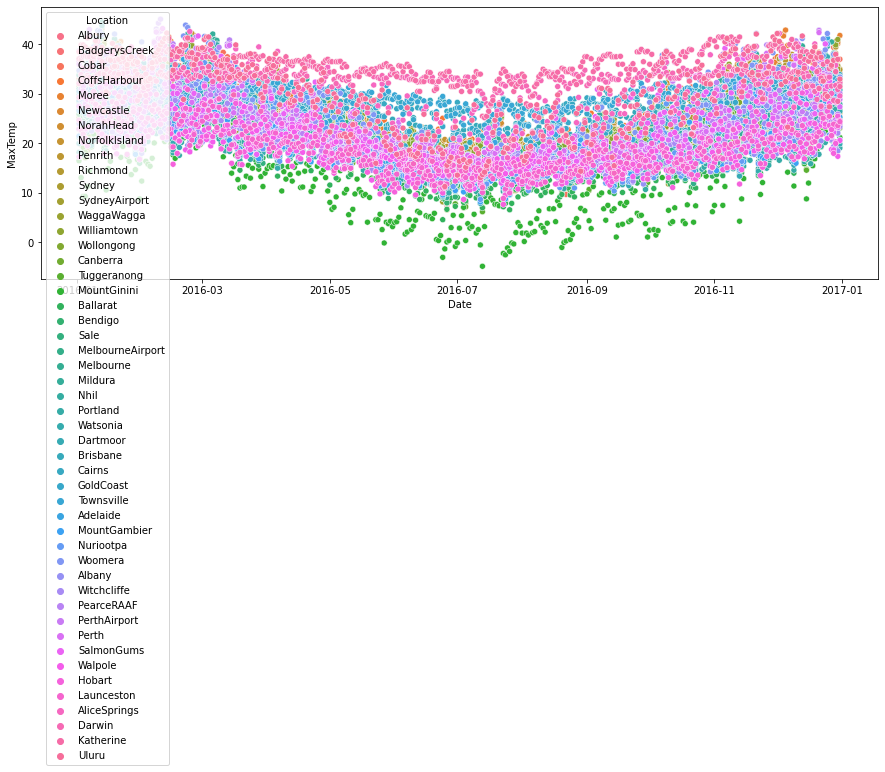

In [9]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = dataFrom2016,y="MaxTemp", x='Date', hue='Location')

<AxesSubplot:xlabel='Date'>

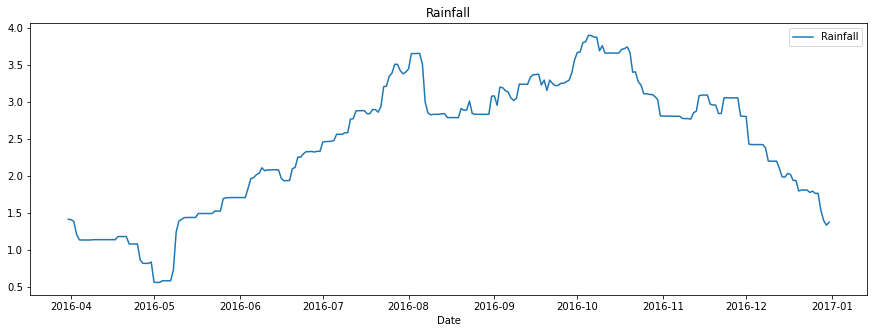

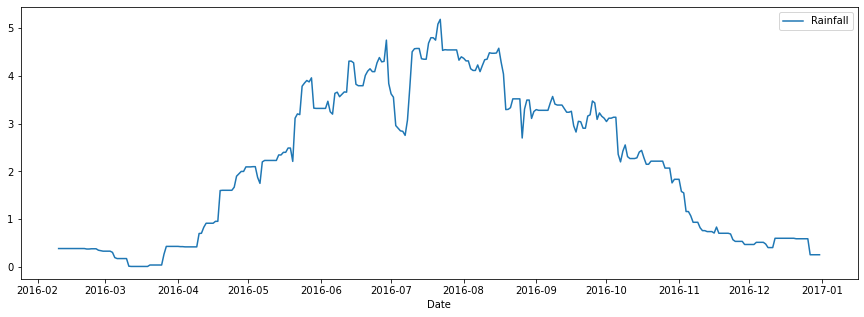

In [10]:
albury2016 = dataFrom2016.loc[dataFrom2016["Location"]=="Albury"];
rainfall = albury2016[["Date", "Rainfall"]]
rainfall.set_index('Date',inplace=True)
plt.figure(figsize=(15,5))
plt.title("Rainfall")
sns.lineplot(data = rainfall.rolling(window=90).mean() , dashes=False)

Perth = dataFrom2016.loc[dataFrom2016["Location"]=="Perth"];
rainfall = Perth[["Date", "Rainfall"]]
rainfall.set_index('Date',inplace=True)
plt.figure(figsize=(15,5))
sns.lineplot(data = rainfall.rolling(window=40).mean() , dashes=False)


In [11]:
weatherData['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weatherData['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)



weatherData["year"] = weatherData.Date.dt.year;
weatherData["month"] = weatherData.Date.dt.month;
weatherData["day"] = weatherData.Date.dt.day;



<AxesSubplot:>

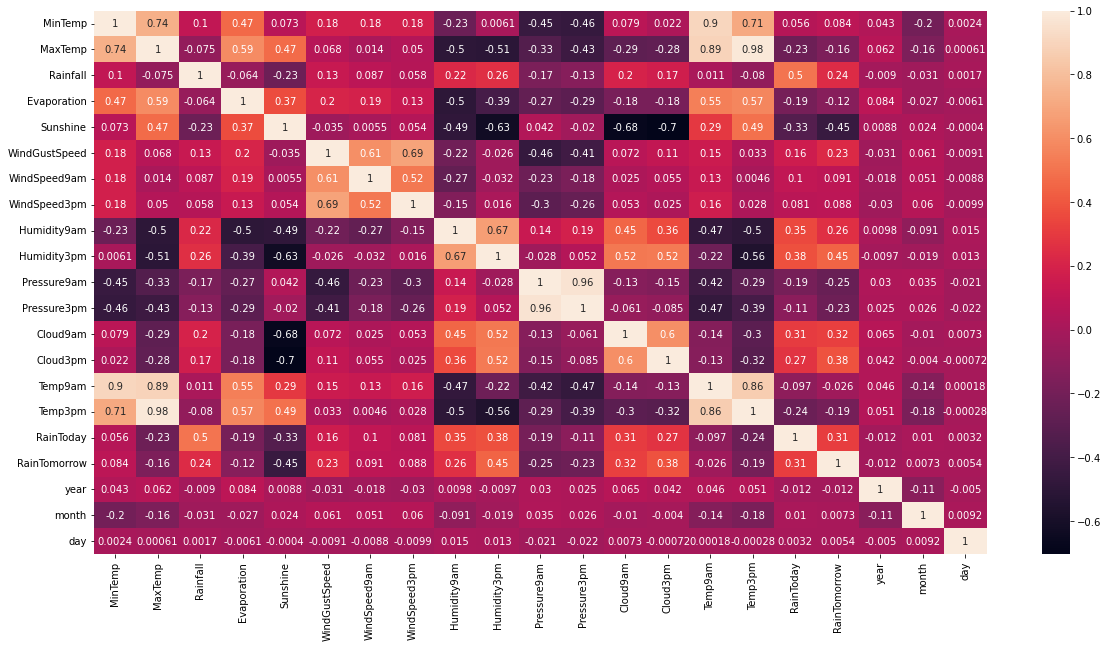

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(weatherData.corr(), annot = True)

In [13]:
weatherData =weatherData.drop(columns=['Date'],axis=1)
weatherData = weatherData.dropna(how='any')
weatherData.shape

(56420, 25)

In [15]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am','Location']

    
weatherData = pd.get_dummies(weatherData, columns=categorical_columns)
weatherData.iloc[4:9]


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,0,0
6055,27.1,36.1,0.0,13.0,0.0,43.0,7.0,20.0,26.0,19.0,...,0,0,0,0,0,0,0,0,0,0
6056,23.3,34.0,0.0,9.8,12.6,41.0,17.0,19.0,33.0,15.0,...,0,0,0,0,0,0,0,0,0,0
6057,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,...,0,0,0,0,0,0,0,0,0,0
6058,19.0,35.5,0.0,12.0,12.3,48.0,30.0,9.0,46.0,28.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weatherData)
weatherData = pd.DataFrame(scaler.transform(weatherData), index=weatherData.index, columns=weatherData.columns)


In [17]:
from sklearn.feature_selection import SelectKBest, chi2
X = weatherData.loc[:,weatherData.columns!='RainTomorrow']
y = weatherData[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Cloud3pm', 'RainToday'], dtype='object')


In [53]:

X = weatherData[[ 'Cloud3pm','Humidity3pm','RainToday','Pressure3pm','month']] # interestingly pressure3pm is very important
y = weatherData[['RainTomorrow']]

In [54]:


#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)



Accuracy : 0.8400567174760724
Time taken : 0.12113070487976074


/home/paule/.conda/envs/leoenv/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

/tmp/ipykernel_5225/786207837.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train,y_train)


Accuracy : 0.8371499468273662
Time taken : 1.1008718013763428


In [52]:

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)



Accuracy : 0.7907834101382488
Time taken : 0.14847135543823242
